# Введение в искусственные нейронные сети
# Урок 3. TensorFlow

In [ ]:
!pip install --upgrade pip
!pip install tensorflow
!pip install tf-nightly

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsolutePercentageError
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize 
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad

In [5]:
X, y = load_boston(return_X_y=True)
print(X.shape)

(506, 13)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential([
    Dense(100, activation='relu', input_shape=(13,)),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1)])
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 100)               1400      
_________________________________________________________________
dense_29 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_30 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 101       
Total params: 21,701
Trainable params: 21,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit( X_train, y_train, epochs=50, batch_size=2, validation_split=0.2)

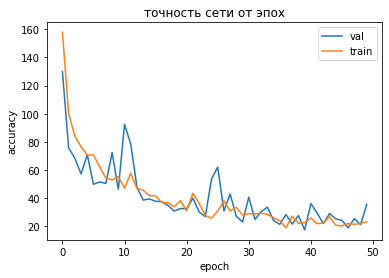

In [ ]:
plt.plot(history.history['val_mse'] ,label='val')
plt.plot(history.history['mse'] ,label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.show()

In [ ]:
test_predictions = model.predict(X_test)

In [ ]:
mean_squared_error(y_test, test_predictions)

35.877093376276235

Нормализуем данные

In [7]:
 X_norm = normalize(X, axis=0, )
 X_train_n, X_test_n, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

In [ ]:
model1 = Sequential([
    Dense(100, activation='relu', input_shape=(13,)),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1)])
model1.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [ ]:
history1 = model1.fit( X_train_n, y_train, epochs=50, batch_size=2, validation_split=0.2)

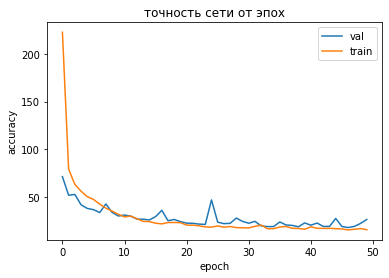

In [ ]:
plt.plot(history1.history['val_mse'] ,label='val')
plt.plot(history1.history['mse'] ,label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.show()

In [ ]:
test_predictions1 = model1.predict(X_test_n)
mean_squared_error(y_test, test_predictions1)

23.602508843526657

Первая модель была построена без нормализации данных, вторая с нормализацией

По результатам видим, что у второй модели меньше колебаний метрики на валидационной выборке

#Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора) на датасет from sklearn.datasets import load_boston (или Fashion_Mnist).


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

In [ ]:
model2 = Sequential([
    Dense(100, activation='relu', input_shape=(13,)),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1)])
model2.compile(optimizer='adam', loss='mse', metrics=['mse'])
history2 = model2.fit( X_train_n, y_train, epochs=50, batch_size=10, validation_split=0.2)

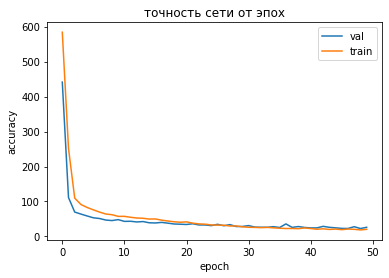

In [ ]:
plt.plot(history2.history['val_mse'] ,label='val')
plt.plot(history2.history['mse'] ,label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.show()

In [ ]:
test_predictions2 = model2.predict(X_test_n)
mean_squared_error(y_test, test_predictions2)

20.948625203798116

In [ ]:
#batch_size=2 mse 16.0397
#batch_size=4 mse 17.68
#batch_size=5 mse 18.62
#batch_size=6 mse 17.7986
#batch_size=8 mse 19.73
#batch_size=10 mse 20.95
#batch_size=20 mse 22.61
#batch_size=30 mse 30.92
#batch_size=40 mse 32.624
#batch_size=60 mse 39.11
#Несколько раз на каждое количество batch обучила модель - получила результаты выше(значение метрики плюс минус)
#Так как данных не так много, то будем следующие модели обучать при batch_size=5

Посмторим как влияет количество слоев и нейронов в слое

In [ ]:
#model3 = Sequential([Dense(100, activation='relu', input_shape=(13,)), Dense(100, activation='relu'), Dense(1)]) 
  #mse 21.949 , 24.29, 22.304
#model3 = Sequential([Dense(50, activation='relu', input_shape=(13,)), Dense(50, activation='relu'), Dense(1)])
  #  mse 26.263, 27.68, 27.1583
#model3 = Sequential([Dense(30, activation='relu', input_shape=(13,)), Dense(30, activation='relu'), Dense(1)])
  #35.5329
#model3 = Sequential([Dense(150, activation='relu', input_shape=(13,)), Dense(150, activation='relu'), Dense(1)])
  #mse 21.120, 20.282, 20.31

#model3 = Sequential([Dense(170, activation='relu', input_shape=(13,)), Dense(170, activation='relu'), Dense(1)])
  #mse 20.392, 19.10, 21.884
#model3 = Sequential([Dense(200, activation='relu', input_shape=(13,)), Dense(200, activation='relu'), Dense(1)])
  #mse 19.48, 19.76, 19.958
#model3 = Sequential([Dense(300, activation='relu', input_shape=(13,)), Dense(300, activation='relu'), Dense(1)])
  #mse 18.164, 17.742, 19.4619
#model3 = Sequential([Dense(500, activation='relu', input_shape=(13,)), Dense(500, activation='relu'), Dense(1)])
  #mse 17.3, 19.34
#model3 = Sequential([Dense(1000, activation='relu', input_shape=(13,)), Dense(1000, activation='relu'), Dense(1)])
  #mse 16.227, 15.90, 18.42

#model3 = Sequential([Dense(1000, activation='relu', input_shape=(13,)),Dense(1000, activation='relu'),Dense(1000, activation='relu'),Dense(1000, activation='relu'),Dense(1)])
  #mse 18.15, 16.76, 24.02 -  очень большие колебания ошибки как трейн так и вал
#model3 = Sequential([Dense(500, activation='relu', input_shape=(13,)),Dense(500, activation='relu'),Dense(500, activation='relu'),Dense(500, activation='relu'),Dense(1)])
  #mse 16.552, 19.238, 16.43 тоже большие колебания ошибок
#model3 = Sequential([Dense(300, activation='relu', input_shape=(13,)),Dense(300, activation='relu'),Dense(300, activation='relu'),Dense(300, activation='relu'),Dense(1)])
  #mse 14.156, 15.5, 22.0715
#model3 = Sequential([Dense(200, activation='relu', input_shape=(13,)),Dense(200, activation='relu'),Dense(200, activation='relu'),Dense(200, activation='relu'),Dense(1)])
  #mse 14.45, 19.21, 17.73
#model3 = Sequential([Dense(170, activation='relu', input_shape=(13,)),Dense(170, activation='relu'),Dense(170, activation='relu'),Dense(170, activation='relu'),Dense(1)])
  #mse 22.9577

#model3 = Sequential([Dense(100, activation='relu', input_shape=(13,)),Dense(100, activation='relu'),Dense(100, activation='relu'),Dense(100, activation='relu'),Dense(1)])
 
  #mse 16.60

#Вывод - с 4 слоями даже при уменьшении количества нейронов в слое на графике видим что значение метрики "скачет", значит надо брать более простую модель

In [ ]:
#model3 = Sequential([Dense(10, activation='relu', input_shape=(13,)),Dense(10, activation='relu'),Dense(10, activation='relu'),Dense(1)])
  #mse 35.71
#model3 = Sequential([Dense(30, activation='relu', input_shape=(13,)),Dense(30, activation='relu'),Dense(30, activation='relu'),Dense(1)])
  #mse 20.836, 26.9
#model3 = Sequential([Dense(50, activation='relu', input_shape=(13,)),Dense(50, activation='relu'),Dense(50, activation='relu'),Dense(1)])
  #mse 19.24
#model3 = Sequential([Dense(70, activation='relu', input_shape=(13,)),Dense(70, activation='relu'),Dense(70, activation='relu'),Dense(1)])
  #mse 18.23, 20.226
#model3 = Sequential([Dense(150, activation='relu', input_shape=(13,)),Dense(150, activation='relu'),Dense(150, activation='relu'),Dense(1)])
  #mse 17.47, 18.882, 26.26

In [ ]:
#При использовании activation='linear' ошибка не была меньше 26 даже при использовании 2 слоев и разного количества нейронов(логировать не стала)

#(optimizer='sgd') - сильно хуже

In [ ]:
#последняя лучшая модель- изменить батч на 2
#model3 = Sequential([
 #   Dense(300, activation='relu', input_shape=(13,)),
 #   Dense(300, activation='relu'),
 #   Dense(1)])
#model3.compile(optimizer='adam', loss='mse', metrics=['mse'])
#history3 = model3.fit( X_train_n, y_train, epochs=50, batch_size=5, validation_split=0.2)
18.49

#optima RMSprop 18.39, 18.87, 19.13970 - приближается но все таки хуже
# Adagrad - сильно хуже обучается за 300 эпох только для ошибки 31

In [ ]:
model3 = Sequential([
    Dense(300, activation='relu', input_shape=(13,)),
    Dense(300, activation='relu'),
    Dense(1)])
model3.compile(optimizer='adam', loss='mse', metrics=['mse'])
history3 = model3.fit( X_train_n, y_train, epochs=50, batch_size=2, validation_split=0.2)

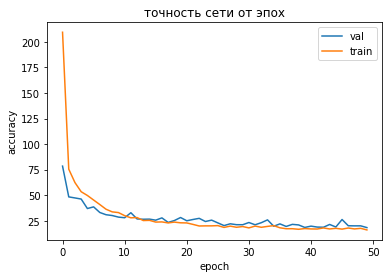

In [ ]:
plt.plot(history3.history['val_mse'] ,label='val')
plt.plot(history3.history['mse'] ,label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.show()

In [ ]:
test_predictions3 = model3.predict(X_test_n)
mean_squared_error(y_test, test_predictions3)

16.78927729265549

Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [9]:
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.metrics import MeanAbsolutePercentageError
from tensorflow.keras.losses import MeanAbsolutePercentageError
from tensorflow.keras.metrics import MeanAbsolutePercentageError
import pandas as pd

In [ ]:
# при 300 модель переобучилась
model4 = Sequential([
    Dense(200, activation='relu', input_shape=(13,)),
    Dense(200, activation='relu'),
    Dense(1)])
model4.compile(optimizer='adam', loss='MeanAbsoluteError', metrics='MeanAbsoluteError')
history4 = model4.fit( X_train_n, y_train, epochs=50, batch_size=2, validation_split=0.2)

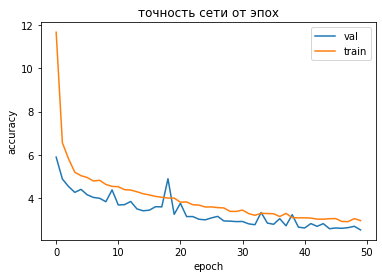

In [ ]:
plt.plot(history4.history['val_mean_absolute_error'] ,label='val')
plt.plot(history4.history['mean_absolute_error'] ,label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.show()

In [ ]:
test_predictions4 = model4.predict(X_test_n)
mean_squared_error(y_test, test_predictions4)

17.006197204287908

Для того, чтобы оценить работу сетей - посмотрим разные варианты 
Будем изменять функцию потерь, метрику, количество нейронов в слоях, а для того, чтобы сравнить результаты моделей с разными метриками будем использовать mse на тестовой выборке. каждую сеть обучим по 3 раза 

In [ ]:
nej = [30, 50, 100, 150, 200]
loss_f = ['MeanAbsoluteError', 'mse', 'MeanAbsolutePercentageError']
metr = ['MeanAbsoluteError', 'mse', 'MeanAbsolutePercentageError']
k = 1
df = pd.DataFrame(columns = ['нейроны 1 и 2 сл', 'loss', 'metric', 'mse test'])
for l in loss_f:
  for m in metr:
    for n in nej:
      for i in [0, 1, 2]:
        model = Sequential([Dense(n, activation='relu', input_shape=(13,)),Dense(n, activation='relu'),Dense(1)])
        model.compile(optimizer='adam', loss=l, metrics=m)
        history = model.fit( X_train_n, y_train, epochs=50, batch_size=2, validation_split=0.2)
        test_predictions = model.predict(X_test_n)
        mse_test = mean_squared_error(y_test, test_predictions)
        df.loc[k] = [n, l, m, mse_test]
        k += 1
        print(k)


In [14]:
df[df['mse test']<18]

,нейроны 1 и 2 сл,loss,metric,mse test
11,150,MeanAbsoluteError,MeanAbsoluteError,17.573912
15,200,MeanAbsoluteError,MeanAbsoluteError,17.472681
27,150,MeanAbsoluteError,mse,17.622780
29,200,MeanAbsoluteError,mse,16.860584
30,200,MeanAbsoluteError,mse,17.521656
44,200,MeanAbsoluteError,MeanAbsolutePercentageError,17.174865
59,200,mse,MeanAbsoluteError,17.906354
60,200,mse,MeanAbsoluteError,17.477290
72,150,mse,mse,17.736863
73,200,mse,mse,17.923120


Лучшие результаты показали модели с функциями потерь mse и mae.(mse на тестовой выборке от 16,5 до 18)
Параметры следующие


*   200 нейронов, loss = mse, metric = mse
*   200 нейронов, loss = MeanAbsoluteError, metric = mse

model = Sequential([Dense(n, activation='relu', input_shape=(13,)),Dense(n, activation='relu'),Dense(1)])
history = model.fit( X_train_n, y_train, epochs=50, batch_size=2, validation_split=0.2)

